## Постановка задачи

На первой практике вам предстоит поработать с реальными данными об истории экспертиз рабочих программ дисциплин в ИТМО.

**Задача:** сделать краткое исследование данных и построить 3 графика двумя способами. Первый способ - самостоятельно. Второй - с активной помощью ChatGPT. Порядок реализации способов значения не имеет. Библиотеки можно использовать любые.

**Цель:** оценить качество помощи ChatGPT для аналитики.

## Загрузка данных

Загрузим датасет в колаб, найти его также можно в папке [Data](https://drive.google.com/drive/folders/1NklhwWT6KVrtRF9GxnI-Z30QKNtNYae1?usp=share_link).

In [ ]:
import pandas as pd

!gdown 1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8

Downloading...
From: https://drive.google.com/uc?id=1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8
To: /content/exp_stats.csv
100% 925k/925k [00:00<00:00, 26.3MB/s]


Посмотрим на данные.

In [ ]:
data = pd.read_csv("/content/exp_stats.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   workprogram_id     7657 non-null   int64 
 1   user_count         7657 non-null   int64 
 2   expertise_status   7657 non-null   object
 3   expertise_counter  7657 non-null   int64 
 4   approval_date_y    7657 non-null   object
 5   title              7657 non-null   object
dtypes: int64(3), object(3)
memory usage: 359.0+ KB


Всего шесть столбцов, все без пропусков:
- `workprogram_id` - айди рабочей программы (РПД)
- `user_count` - сколько человек принимали участие в создании РПД
- `expertise_status` - на каком этапе экспертизы находится РПД (статус экспертизы: AC - одобрена, RE - на доработке, AR - в архиве, EX - на экспертизе, WK - в работе)
- `expertise_counter` - сколько раз РПД проходила экспертизу
- `approval_date` - день, когда РПД признали удовлетворяющей всем требованиям и разрешили ее реализовывать
- `title` - название дисциплины


In [ ]:
data.head()

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
0,2626,4,AC,1,2022-05-06 14:23:17.924 +0200,Философия
1,8461,4,AC,1,2022-04-28 09:01:59.171 +0200,Философия
2,2627,3,AC,5,2021-08-31 20:51:19.142 +0200,Введение в цифровую культуру и программирование
3,2628,4,AC,0,2022-04-28 11:36:30.474 +0200,Проектирование баз данных
4,2631,4,AC,0,2022-04-28 12:06:31.165 +0200,Современные вопросы информатики


## Краткое исследование данных

В данных не слишком много столбцов и уже известно, что нет пустых ячеек. Теперь неплохо было бы погрузиться в них и ответить на 3 небольших вопроса:
1. Какой период охватывают данные в датасете?
2. Есть ли в данных нетипичные значения? Например, неположительные числа в столбце `user_count`. Или даты, которые сильно выбиваются из общего диапазона значений.
3. Есть ли нелогичные значения в данных? Например, статус РПД "в работе", но есть `approval_date`. Или статус "одоберно", но РПД 0 раз проходила экспертизу.



In [ ]:
print('Данные в диапазоне', min(data['approval_date_y'].dt.date), ' - ', max(data['approval_date_y'].dt.date))

print('Отрицательное количество user_count:',len(data.loc[(data['user_count'] < 0)]))

print('Нелогичное значение в данных:',len(data.loc[(data['expertise_status'] == 'WK') & (data['approval_date_y'] is not None)]) + len(data.loc[(data['expertise_status'] == 'AC') & (data['expertise_counter'] < 1)]))

Данные в диапазоне 2021-04-21  -  2023-04-17
Отрицательное количество user_count: 0
Нелогичное значение в данных: 2923


In [ ]:
#chatGPT
# Найдем минимальную и максимальную дату в столбце approval_date
start_date = data['approval_date_y'].min()
end_date = data['approval_date_y'].max()

# Выведем период охвата данных
print('Период охвата данных:', start_date.strftime('%Y-%m-%d'), ' - ', end_date.strftime('%Y-%m-%d'))

# Проверка столбца user_count на наличие неположительных значений
negative_user_count = data[data['user_count'] < 0]
if not negative_user_count.empty:
    print("Присутствуют неположительные значения в столбце user_count:")
    print(negative_user_count)

# Проверка столбца approval_date на выбивающиеся даты
min_date = data['approval_date_y'].min()
max_date = data['approval_date_y'].max()
outlier_dates = data[(data['approval_date_y'] < min_date) | (data['approval_date_y'] > max_date)]
if not outlier_dates.empty:
    print("Присутствуют выбивающиеся даты в столбце approval_date:")
    print(outlier_dates)

# Проверка наличия нелогичных значений для столбцев expertise_status, expertise_counter и approval_date
illogical_values = data[
    ((data['expertise_status'] == 'WK') & (~data['approval_date_y'].isnull())) |
    ((data['expertise_status'] == 'AC') & (data['expertise_counter'] == 0))
]
if not illogical_values.empty:
    print("Присутствуют нелогичные значения:")
    print(illogical_values)

Период охвата данных: 2021-04-21  -  2023-04-17
Присутствуют нелогичные значения:
      workprogram_id  user_count expertise_status  expertise_counter  \
3               2628           4               AC                  0   
4               2631           4               AC                  0   
18             19151          10               AC                  0   
22             22808           2               AC                  0   
23              2654           7               AC                  0   
...              ...         ...              ...                ...   
7650           24945           4               AC                  0   
7651           24946           4               AC                  0   
7652           24947           4               AC                  0   
7655           24983           4               AC                  0   
7656           24992           4               AC                  0   

                      approval_date_y  \
3    2022-04

Теперь ответьте на более интересные вопросы с использованием визуализаций.

### 1. Как распределяется количество редакторов рабочих программ на всем периоде наблюдений?

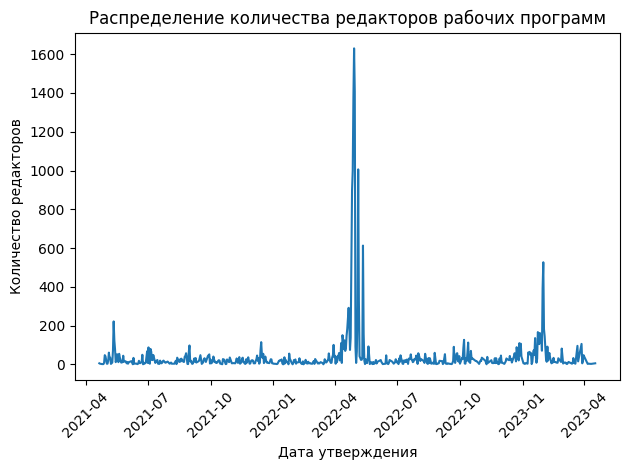

In [ ]:
daily_counts = data.groupby(data['approval_date_y'].dt.date)['user_count'].sum()
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Дата утверждения')
plt.ylabel('Количество редакторов')
plt.title('Распределение количества редакторов рабочих программ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

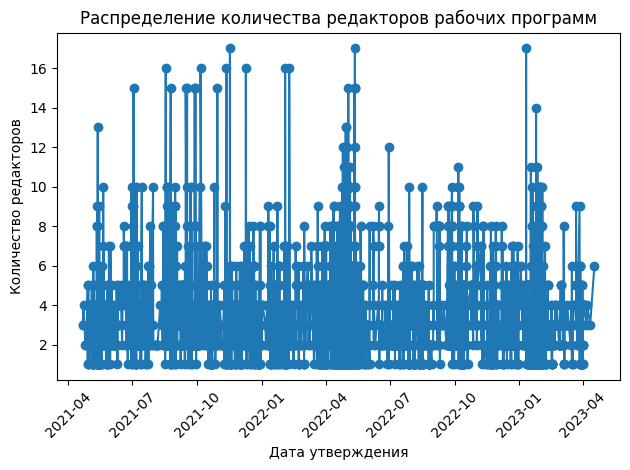

In [ ]:
#chatGPT
import matplotlib.pyplot as plt
# Группируем данные по дате утверждения и считаем суммарное количество редакторов
grouped_data = data.groupby('approval_date_y')['user_count'].sum()

# Построение графика
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Дата утверждения')
plt.ylabel('Количество редакторов')
plt.title('Распределение количества редакторов рабочих программ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Как со временем менялось среднее количество экспертиз РПД?

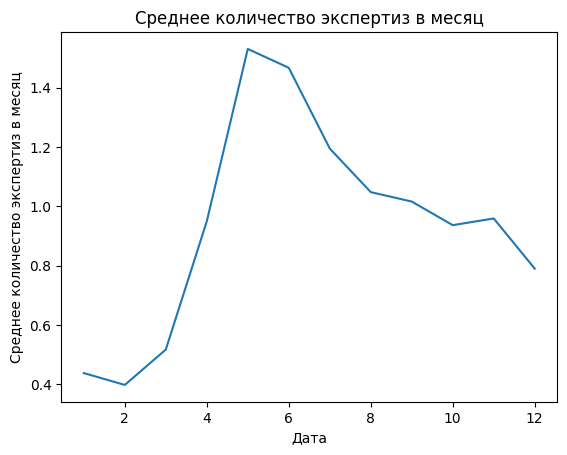

In [ ]:
grouped_data = data.groupby(data['approval_date_y'].dt.month)['expertise_counter'].mean()
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Дата')
plt.ylabel('Среднее количество экспертиз в месяц')
plt.title('Среднее количество экспертиз в месяц')
plt.show()

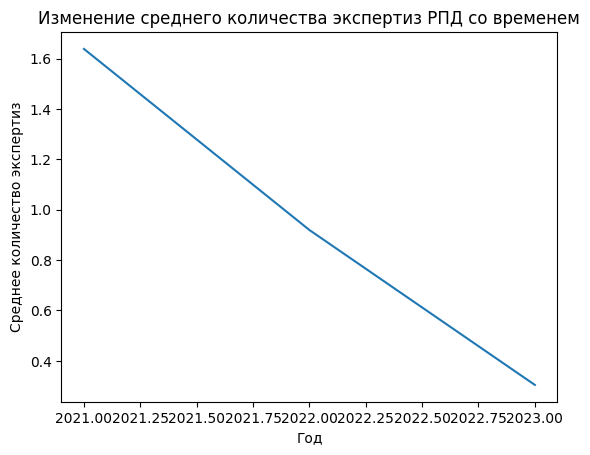

In [ ]:
#chatGPT
data['approval_date_y'] = pd.to_datetime(data['approval_date_y'], utc=True)

# группировка данных по годам и подсчет среднего количества экспертиз
grouped_data = data.groupby(data['approval_date_y'].dt.year)['expertise_counter'].mean()

# построение графика
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Год')
plt.ylabel('Среднее количество экспертиз')
plt.title('Изменение среднего количества экспертиз РПД со временем')
plt.show()

### 3. Есть ли зависимость между датой и присвоением статуса "одобрено" (AC)?

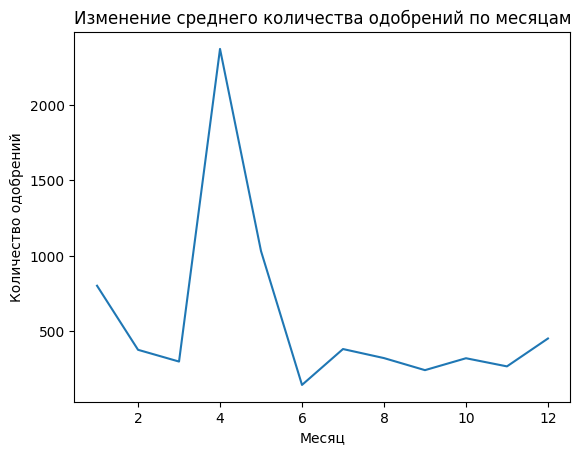

In [ ]:
approved_data = data[data['expertise_status'] == 'AC']
approval_counts = approved_data.groupby(data['approval_date_y'].dt.month)['workprogram_id'].count()
plt.plot(approval_counts.index, approval_counts.values)
plt.xlabel('Месяц')
plt.ylabel('Количество одобрений')
plt.title('Изменение среднего количества одобрений по месяцам')
plt.show()

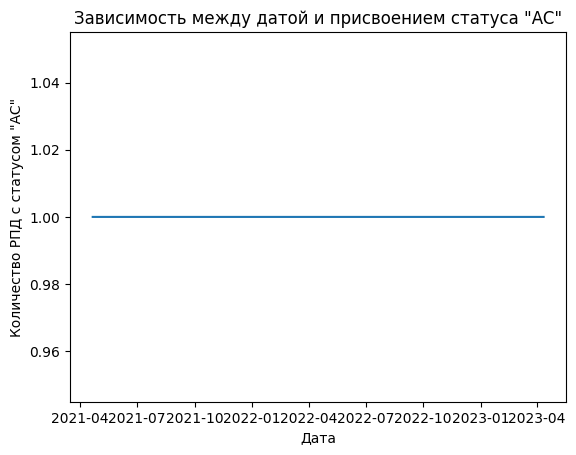

In [ ]:
#chatGPT
# преобразование столбца approval_date в формат даты
data['approval_date_y'] = pd.to_datetime(data['approval_date_y'])

# фильтрация данных по статусу экспертизы "AC"
ac_data = data[data['expertise_status'] == 'AC']

# группировка данных по дате и подсчет количества РПД с статусом "AC"
grouped_data = ac_data.groupby('approval_date_y')['workprogram_id'].count()

# построение графика
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Дата')
plt.ylabel('Количество РПД с статусом "AC"')
plt.title('Зависимость между датой и присвоением статуса "AC"')
plt.show()